In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [235]:
pd.options.display.max_columns = 50  # allows viewing all columns

In [236]:
df = pd.read_csv('data/aviation_cleaned.csv')

/Users/samalainabayeva/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [237]:
df.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                88889 non-null  object
 1   investigation_type      88889 non-null  object
 2   accident_number         88889 non-null  object
 3   event_date              88889 non-null  object
 4   location                88889 non-null  object
 5   country                 88889 non-null  object
 6   airport_code            88889 non-null  object
 7   airport_name            88889 non-null  object
 8   injury_severity         88889 non-null  object
 9   aircraft_damage         88889 non-null  object
 10  aircraft_category       88889 non-null  object
 11  make                    88889 non-null  object
 12  model                   88889 non-null  object
 13  amateur_built           88889 non-null  object
 14  number_of_engines       88889 non-null  object
 15  en

# CLEANING COLUMNS

### Years

In [239]:
df["year_of_event"] = df['event_date'].map(lambda x: int(x[:4]))

### Months

In [240]:
df['month'] = df['event_date'].map(lambda x: int(x[5:7]))

In [241]:
df['month'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

### Days

In [242]:
df['days'] = df['event_date'].map(lambda x: int(x[-2:]))

In [243]:
df['days'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

### Need to convert injury columns to ints...

In [244]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [245]:
df['total_serious_injuries'] = df['total_serious_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

In [246]:
df['total_minor_injuries'] =df['total_minor_injuries'].map(lambda x: float(x) if x != "Unknown" else x)

### CREATING NEW COLUMN FOR NON-FATAL INJURIES

In [247]:
df["survivable_injuries"] = (df['total_minor_injuries'].replace("Unknown", 0)) + (df["total_serious_injuries"].replace("Unknown", 0))

In [248]:
df['survivable_injuries'].value_counts()[:10]

0.0     63365
1.0     15270
2.0      6903
3.0      1580
4.0       901
5.0       258
6.0       161
7.0       100
8.0        57
9.0        37
10.0       29
Name: survivable_injuries, dtype: int64

### REPLACING 'Unknown' with Median values - all zeros

In [249]:
df['total_minor_injuries'] = df['total_minor_injuries'].replace("Unknown", 0)

In [250]:
df['total_serious_injuries'] = df['total_serious_injuries'].replace("Unknown", 0)

In [251]:
df['total_fatal_injuries'] = df['total_fatal_injuries'].replace("Unknown", 0)

### LOWERCASE Country Column

In [252]:
df['country'] = df['country'].str.lower()

### CREATING NEW COLUMN FOR NON-FATAL INJURIES

In [253]:
df["survivable_injuries"] = (df['total_minor_injuries'].replace("Unknown", 0)) + (df["total_serious_injuries"].replace("Unknown", 0))

### Purpose of Flight:

In [254]:
df['purpose_of_flight'].value_counts()

Personal                     49448
Unknown                      12994
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

# Make of Aircraft Standardization:

In [279]:
df['make'] = df['make'].str.lower().str.strip()

### Initial list of values/counts before cleaning 

In [280]:
df['make'].value_counts()[:10]

cessna      27149
piper       14870
beech        5372
boeing       2745
bell         2722
mooney       1334
robinson     1230
grumman      1172
bellanca     1045
hughes        932
Name: make, dtype: int64

### Making Manufacturer Column

In [281]:
df['manufacturer'] = df['make']

#### Cessna cleaning... Perfect Clean

In [283]:
df['manufacturer'].str.contains('cessna').sum()

0

In [282]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Cessna" if "cessna" in x else x)

In [284]:
df['manufacturer'].str.contains('Cessna').sum()

27215

#### Piper cleaning...... Perfect Clean

In [285]:
df['manufacturer'].str.contains('piper').sum()

14946

In [286]:
df[(df['manufacturer'].str.contains('piper') == True) & (df['manufacturer'] != 'piper')]['manufacturer'].value_counts()

piper aircraft inc            27
piper aircraft corporation    11
piper/cub crafters             7
piper aircraft                 7
new piper aircraft inc         6
piper aircraft, inc.           3
new piper                      3
piper aerostar                 2
piper / laudeman               1
piper pawnee                   1
piper/stevens                  1
jetprop dlx piper              1
piper-aerostar                 1
thomas c. piper                1
piper cub crafters             1
new piper aircraft, inc.       1
piper/wally's flyers inc       1
piper-harris                   1
Name: manufacturer, dtype: int64

In [287]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Piper" if "piper" in x else x)

#### Beech cleaning..... Perfect Clean

In [297]:
df['manufacturer'].str.contains("beech").sum()

0

In [298]:
df.loc[(df['manufacturer'].str.contains('beech') == True) & (df['manufacturer'] != 'beech')]['manufacturer'].value_counts()

Series([], Name: manufacturer, dtype: int64)

In [299]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Beech" if "beech" in x else x)

#### Boeing Cleaning....... Perfect Clean

In [300]:
df['manufacturer'].str.contains("boeing").sum()

2833

In [301]:
df[(df['manufacturer'].str.contains('boeing') == True) & (df['manufacturer'] != 'boeing')]['manufacturer'].value_counts()

boeing stearman                   51
the boeing company                 9
boeing company                     9
boeing vertol                      6
boeing helicopters div.            3
boeing - canada (de havilland)     2
boeing company, long beach div     1
boeing-vertol                      1
boeing commercial airplane gro     1
boeing 777-306er                   1
boeing of canada/dehav div         1
boeing-stearman                    1
boeing (stearman)                  1
boeing-brown                       1
Name: manufacturer, dtype: int64

In [302]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Boeing" if "boeing" in x else x)

#### Bellanca BEFORE Bell Cleaning.......

In [303]:
df['manufacturer'].str.contains("bellanca").sum()

1047

In [304]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Bellanca" if 'bellanca' in x else x)

In [305]:
df['manufacturer'].str.contains("Bellanca").sum()

1047

### Bell now.... not perfect, but close

In [306]:
df['manufacturer'].str.contains('bell').sum()

2846

In [307]:
df[(df['manufacturer'].str.contains('bell') == True) & (df['manufacturer'] != 'bell')]['manufacturer'].value_counts()[:10]

bell helicopter textron canada    23
bell helicopter textron           23
bell helicopter                    7
agusta bell                        5
bell-carson                        3
bell-transworld                    3
bell textron canada ltd            2
bell-k copter                      2
campbell earl s jr                 2
bell helicopter co                 2
Name: manufacturer, dtype: int64

##### Bell and Copter combined in this conditional selection was a good way to edit the names

In [311]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Bell" if all(word in x for word in ['copter', 'bell', 'textron']) else x)

In [313]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Bell" if x == "bell" else x)

### Mooney Edit - Perfect Edit

In [315]:
df['manufacturer'].str.contains('mooney').sum()  # 1334

1385

In [317]:
df.loc[(df["manufacturer"].str.contains('mooney') == True) & (df['manufacturer'] != "mooney")]['manufacturer'].value_counts()

mooney aircraft corp.            35
mooney airplane co inc           10
mooney, dan                       1
mooney aircraft corporation       1
mooney aircraft                   1
mooney international corp         1
mooney aircraft corp              1
mooney airplane company, inc.     1
Name: manufacturer, dtype: int64

### Special Condition, looked like a name

In [319]:
df["manufacturer"] = df["manufacturer"].map(lambda x: "Dan Mooney" if x == "mooney, dan" else x)

In [320]:
df["manufacturer"] = df["manufacturer"].map(lambda x: 'Mooney' if "mooney" in x else x)

### Robinson Edit-Good Edit

In [323]:
df['manufacturer'].str.contains('robinson').sum()

1691

In [324]:
df.loc[(df["manufacturer"].str.contains('robinson') == True) & (df['manufacturer'] != "robinson")]['manufacturer'].value_counts()

robinson helicopter               230
robinson helicopter company       194
robinson helicopter co             22
robinson michael e                  2
rand robinson                       2
robinson helicopter co inc          1
failing/rand-robinson               1
robinson helicopters                1
rand robinson engineering           1
robinson helicopter co.             1
whitten robinson                    1
hutton rand robinson                1
wayne o robinson                    1
robinson stewart j                  1
rand/robinson                       1
weaver stanley r/robinson scot      1
Name: manufacturer, dtype: int64

In [325]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Robinson" if all(word in x for word in ['helicopter', 'robinson']) else x)

In [326]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Robinson" if x == 'robinson' else x)

### Grumman Edit -Perfect and Easy

In [328]:
df['manufacturer'].str.contains('grumman').sum()

1647

In [329]:
df.loc[(df["manufacturer"].str.contains('grumman') == True) & (df['manufacturer'] != "grumman")]['manufacturer'].value_counts()

grumman american                  226
grumman-schweizer                 127
grumman acft eng cor-schweizer     58
grumman american avn. corp.        50
grumman acft eng                    2
grumman schweizer                   2
grumman american aviation           2
grumman aircraft eng corp           2
grumman american corporation        1
grumman aircraft                    1
grumman aircraft cor-schweizer      1
grumman acft eng cor                1
grumman american avn. corp          1
grumman american aviation corp      1
Name: manufacturer, dtype: int64

In [330]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Grumman" if 'grumman' in x else x)

### Hughes Edit - not quite perfect, but good

In [332]:
df['manufacturer'].str.contains('hughes').sum()

946

In [334]:
df.loc[(df["manufacturer"].str.contains('hughes') == True) & (df['manufacturer'] != "hughes")]['manufacturer'].value_counts()

hughes helicopters inc            3
hughes aero corp                  2
schweizer(hughes)aircraft corp    2
hughes charles r                  1
hughes/helicopter assocs inc      1
eugene hughes                     1
schweizer(hughes)                 1
hughes j/hughes j                 1
hughes aero                       1
hughes cassutt                    1
Name: manufacturer, dtype: int64

In [335]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Hughes" if x == 'hughes' else x)

In [336]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Hughes" if all(word in x for word in ['helicopter', 'hughes']) else x)

In [337]:
df['manufacturer'] = df['manufacturer'].map(lambda x: "Hughes" if all(word in x for word in ['aero', 'hughes']) else x)

# Post-Edit Value_Counts

In [338]:
df['manufacturer'].value_counts()[:10]

Cessna      27215
Piper       14946
Beech        5462
Boeing       2833
Bell         2769
Robinson     1679
Grumman      1647
Mooney       1384
Bellanca     1047
Hughes        939
Name: manufacturer, dtype: int64

# TOP TEN AIRCRAFT ARE ALL CLEANED WELL!!!!!

In [373]:
df.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,year_of_event,month,days,survivable_injuries,manufacturer
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",united states,Unknown,Unknown,Fatal(2),Destroyed,Unknown,stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,1948,10,24,0.0,stinson
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,1962,7,19,0.0,Piper


# Trendline of Reports Over Years of Sample

In [417]:
events_per_year = df['year_of_event'].value_counts().sort_index(ascending=False)
events_per_year.values

array([1607, 1545, 1392, 1624, 1681, 1638, 1664, 1582, 1535, 1561, 1835,
       1850, 1786, 1783, 1893, 2016, 1851, 2031, 1952, 2085, 2020, 2063,
       2220, 2209, 2226, 2148, 2187, 2309, 2257, 2313, 2355, 2462, 2518,
       2544, 2730, 2828, 2880, 3096, 3457, 3556, 3593,    1,    2,    1,
          1,    1,    1])

In [389]:
df['year_of_event'].value_counts().sort_index().index

Int64Index([1948, 1962, 1974, 1977, 1979, 1981, 1982, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020, 2021, 2022],
           dtype='int64')

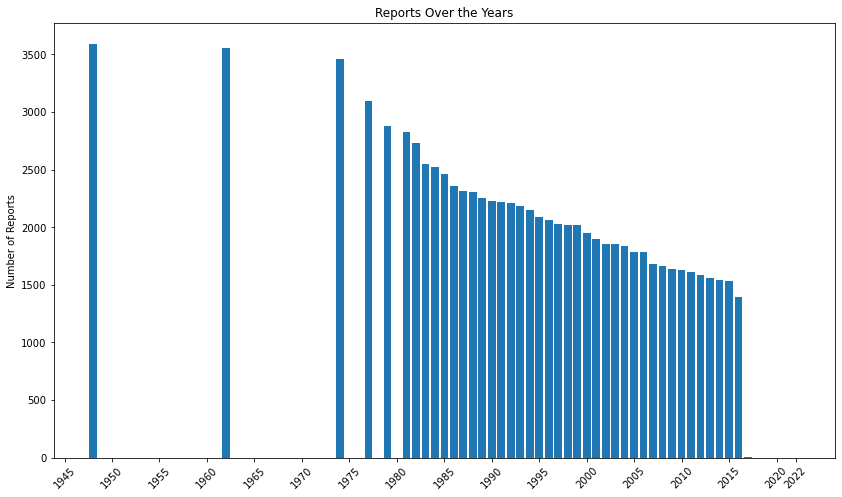

In [418]:
xticks = [1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2022]

fig, ax = plt.subplots(figsize=(14,8))
ax.bar(list(df['year_of_event'].value_counts().sort_index().index), 
             list(df['year_of_event'].value_counts().values))
ax.set_xticks(xticks)
ax.set_xticklabels(labels=xticks, rotation=45)
ax.set_title("Reports Over the Years")
ax.set_ylabel("Number of Reports");

# Manufacturer Related Info

### Plot of Models Reports by Percentage

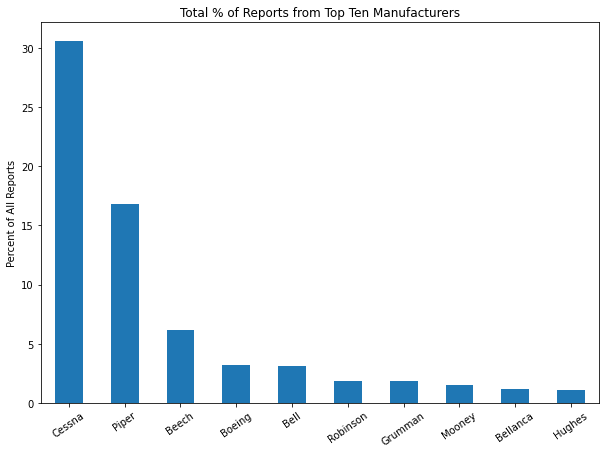

In [345]:
(df['manufacturer'].value_counts(normalize=True)[:10] * 100).plot(kind="bar", rot=35, figsize=(10,7), 
                    title= "Total % of Reports from Top Ten Manufacturers", ylabel="Percent of All Reports");

In [346]:
df['manufacturer'].value_counts()[:20]

Cessna               27215
Piper                14946
Beech                 5462
Boeing                2833
Bell                  2769
Robinson              1679
Grumman               1647
Mooney                1384
Bellanca              1047
Hughes                 939
schweizer              773
air tractor            691
aeronca                636
mcdonnell douglas      608
maule                  589
champion               519
stinson                439
aero commander         429
de havilland           422
luscombe               414
Name: manufacturer, dtype: int64

# Purpose of Flight Info

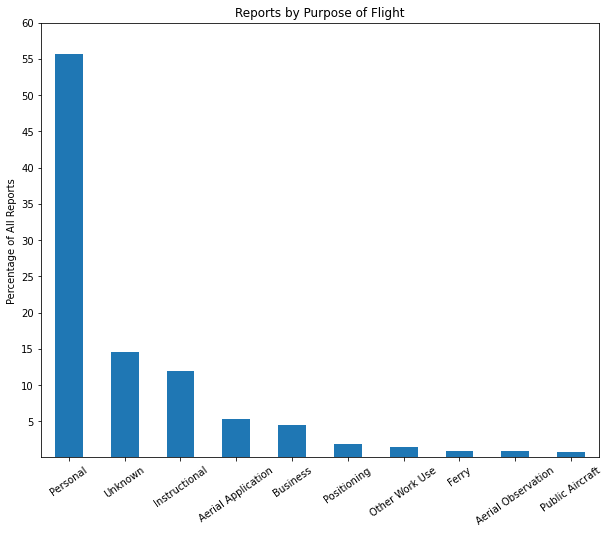

In [356]:
(df['purpose_of_flight'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', figsize=(10,8), 
                        title="Reports by Purpose of Flight", ylabel="Percentage of All Reports", 
                        rot=35, yticks=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]);

# Air Carrier - Such small values relative to size of data, unreliable

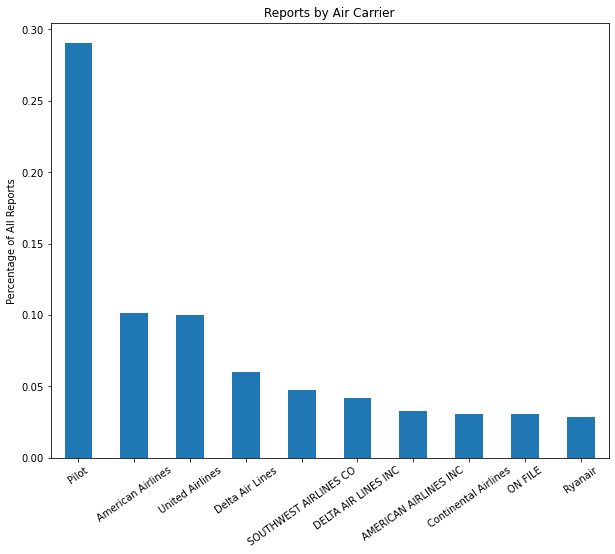

In [371]:
(df['air_carrier'].value_counts(normalize=True).drop('Unknown')[:10]*100).plot(kind='bar', figsize=(10,8), 
                        title="Reports by Air Carrier", ylabel="Percentage of All Reports", 
                        rot=35);

# Aircraft Category -

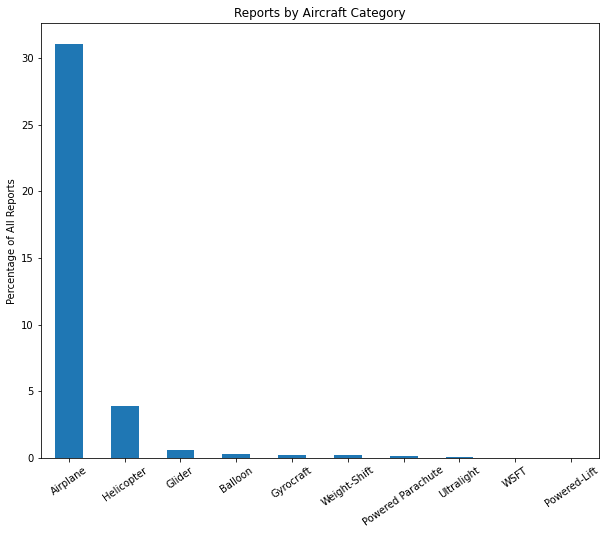

In [372]:
(df['aircraft_category'].value_counts(normalize=True).drop('Unknown')[:10]*100).plot(kind='bar', figsize=(10,8), 
                        title="Reports by Aircraft Category", ylabel="Percentage of All Reports", 
                        rot=35);

In [203]:
df.loc[(df['aircraft_category'] == 'Unknown')  & (df['manufacturer'] == 'Cessna')]['aircraft_category'].value_counts()

Unknown    18682
Name: aircraft_category, dtype: int64

### MISC DATA STUFF - CLEAN IT UP WHEN POSSIBLE

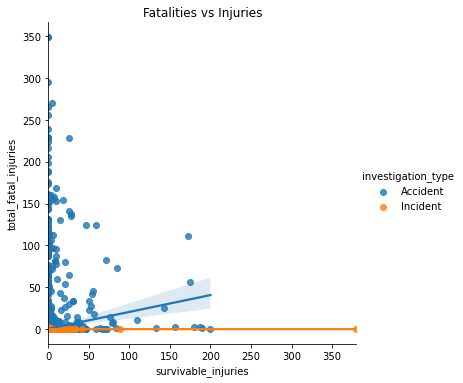

In [14]:
sns.lmplot(y='total_fatal_injuries', x='survivable_injuries', data = df, hue='investigation_type')
plt.title("Fatalities vs Injuries");

In [15]:
boeing_inc = df[(df['make'] == "BOEING") & (df['investigation_type'] == 'Incident')]

# Clean Countries all Lower Case

In [35]:
df['country'] = df['country'].str.lower()

# SEPARATING STATES / ASSIGNING REGIONS

In [36]:
df["states_names"] = df['location'].map(lambda x: x[-2:])

In [37]:
central = ["WI", 'MN', 'IL', 'IA', 'IN', 'MI', 'MO', 'KS', 'ND', 'SD', 'NE', 'OK', 'TX']

In [38]:
northeast = ["ME", 'WV', 'DC', 'OH', 'RI', 'NH', 'VT', 'CT', 'PA', 'MA', 'DE', 'NY', 'NJ', 'MD']

In [39]:
southeast = ['VA', 'NC', 'SC', 'GA', 'AL', 'MS', 'LA', 'TN', 'AR', 'KY', 'FL']

In [40]:
west = ['MT', 'WY', 'CO', 'NM', 'AZ', 'NV', 'UT', 'ID', 'WA', 'OR', 'CA', 'HI', 'AK']

In [41]:
len(central + northeast + southeast + west)

51

In [42]:
df.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,states_names
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",united states,Unknown,Unknown,Fatal(2),Destroyed,Unknown,Stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,0.0,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,Piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,0.0,CA


### CENTRAL STATES

In [43]:
central_states = df.loc[(df['states_names'].isin(central)  == True) & (df["country"] == 'united states')]

In [44]:
central_states["states_names"].unique()

array(['MN', 'TX', 'OK', 'MI', 'IN', 'MO', 'IL', 'KS', 'IA', 'WI', 'SD',
       'NE', 'ND'], dtype=object)

In [45]:
central_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries
count,20799.000000,20799.000000,20799.000000,20799.000000
mean,0.323910,0.208904,0.283764,0.492668
std,1.907199,0.720522,1.339468,1.770062
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000
max,156.000000,47.000000,125.000000,172.000000


In [46]:
c_plot = central_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()
c_plot

total_fatal_injuries     6737.0
survivable_injuries     10247.0
dtype: float64

### Weather for Reports w Fatalities

In [47]:
central_states.loc[central_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        2778
IMC         721
Unknown      57
Name: weather_condition, dtype: int64

In [48]:
c_weather_ratio = (central_states.loc[central_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts())/721
c_weather_ratio

VMC        3.852982
IMC        1.000000
Unknown    0.079057
Name: weather_condition, dtype: float64

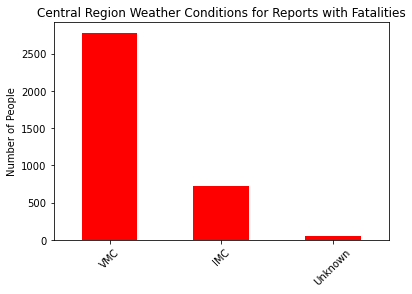

In [49]:
central_states.loc[central_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
                            title="Central Region Weather Conditions for Reports with Fatalities",
                            ylabel="Number of People", color='red', rot=45);

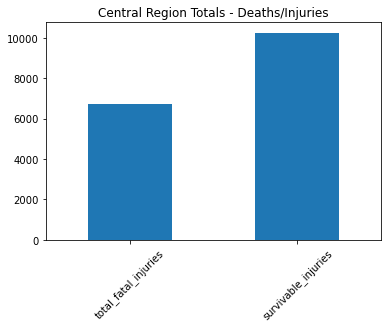

In [50]:
central_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                        title= "Central Region Totals - Deaths/Injuries", rot=45);

In [51]:
central_states.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,states_names
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,Cessna,180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,0.0,MN
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",united states,T72,HEARNE MUNICIPAL,Fatal(1),Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,Personal,Unknown,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,0.0,TX


# TOP TEN MAKE STATS FOR THE CENTRAL REGION

In [52]:
cent_top_ten_list = list(central_states['make'].value_counts()[:10].index)

In [53]:
central_top_ten_df = central_states.loc[central_states['make'].isin(cent_top_ten_list) == True]
central_top_ten_df['make'].value_counts()

Cessna     5562
Piper      2938
Beech      1160
CESSNA      957
PIPER       577
Bell        392
Boeing      309
Grumman     260
Mooney      257
BEECH       256
Name: make, dtype: int64

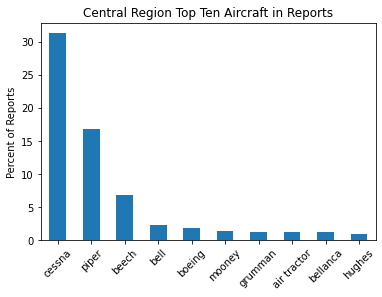

In [386]:
(central_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', 
                            title="Central Region Top Ten Aircraft in Reports", ylabel= "Percent of Reports", rot=45);

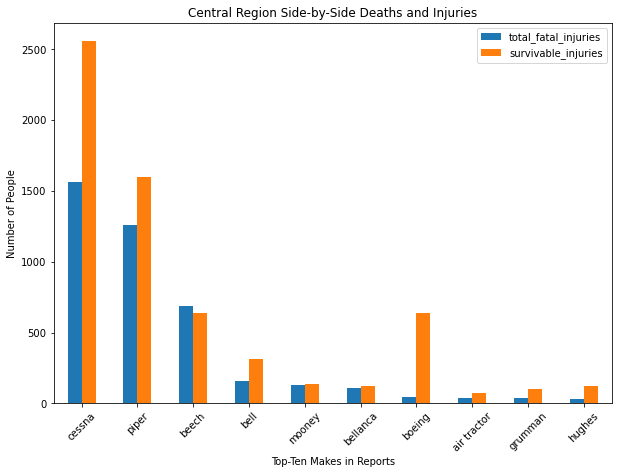

In [389]:
central_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Central Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

### NORTHEAST STATES

In [390]:
northeast_states = df.loc[(df['states_names'].isin(northeast)  == True)  & (df["country"] == 'united states')] 

In [187]:
northeast_states["states_names"].unique()

array(['OH', 'MA', 'NJ', 'PA', 'NY', 'MD', 'WV', 'DC', 'VT', 'NH', 'CT',
       'ME', 'RI', 'DE'], dtype=object)

In [183]:
northeast_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,10806.000000,10806.00000,10806.000000,10806.000000,10806.000000
mean,0.424209,0.24727,0.338331,0.585601,1997.650935
std,4.047445,1.56066,1.231811,2.083591,11.581909
min,0.000000,0.00000,0.000000,0.000000,1979.000000
25%,0.000000,0.00000,0.000000,0.000000,1987.000000
50%,0.000000,0.00000,0.000000,0.000000,1996.000000
75%,0.000000,0.00000,0.000000,1.000000,2007.000000
max,265.000000,125.00000,36.000000,133.000000,2022.000000


In [292]:
n_plot = northeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()
n_plot

total_fatal_injuries    4584.0
survivable_injuries     6328.0
dtype: float64

In [295]:
northeast_states.loc[northeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        1423
IMC         532
Unknown      36
Name: weather_condition, dtype: int64

In [297]:
ne_weather_ratio = northeast_states.loc[northeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()/532
ne_weather_ratio

VMC        2.674812
IMC        1.000000
Unknown    0.067669
Name: weather_condition, dtype: float64

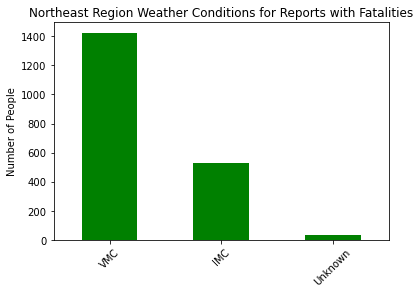

In [397]:
northeast_states.loc[northeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
                            title="Northeast Region Weather Conditions for Reports with Fatalities", 
                            ylabel="Number of People", color='green', rot=45);

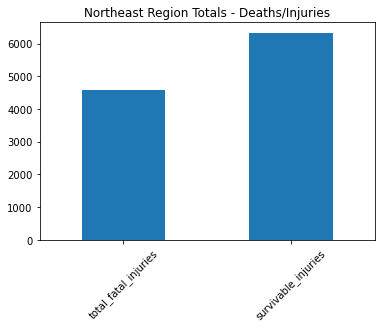

In [396]:
northeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                            title= "Northeast Region Totals - Deaths/Injuries", rot=45);

# TOP TEN MAKE STATS FOR THE NORTHEAST

In [359]:
northeast_top_ten_list = list(northeast_states['make'].value_counts()[:10].index)

In [361]:
northeast_top_ten_df = northeast_states.loc[northeast_states['make'].isin(northeast_top_ten_list) == True]
northeast_top_ten_df['make'].value_counts()

cessna       3318
piper        2142
beech         638
boeing        245
mooney        224
bell          198
schweizer     156
robinson      134
bellanca      125
aeronca       124
Name: make, dtype: int64

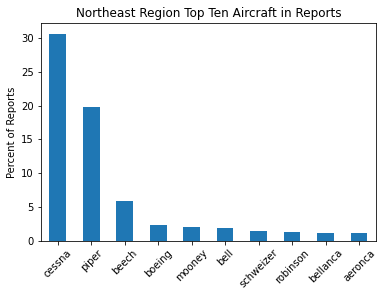

In [401]:
(northeast_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', 
                            title="Northeast Region Top Ten Aircraft in Reports", 
                            ylabel= "Percent of Reports", rot=45);

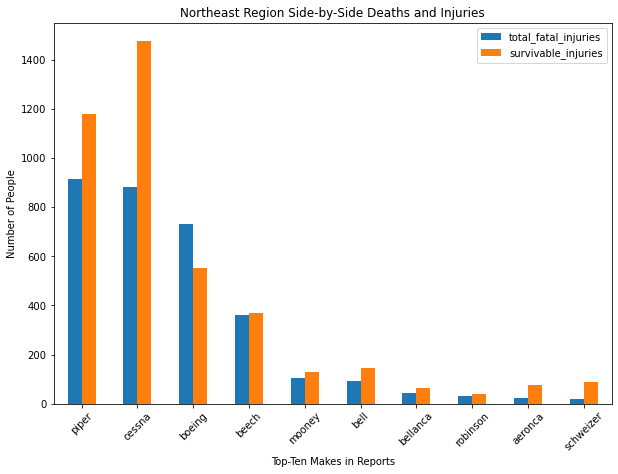

In [404]:
northeast_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Northeast Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

### SOUTHEAST STATES

In [191]:
southeast_states = df.loc[(df['states_names'].isin(southeast)  == True) & (df["country"] == 'united states')]

In [192]:
southeast_states["states_names"].unique()

array(['VA', 'FL', 'AL', 'LA', 'AR', 'GA', 'NC', 'SC', 'MS', 'KY', 'TN'],
      dtype=object)

In [193]:
southeast_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,18217.000000,18217.000000,18217.000000,18217.000000,18217.000000
mean,0.378932,0.224351,0.284679,0.509030,1998.740352
std,1.811179,0.728523,1.088065,1.478709,11.761047
min,0.000000,0.000000,0.000000,0.000000,1974.000000
25%,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,0.000000,0.000000,0.000000,0.000000,1997.000000
75%,0.000000,0.000000,0.000000,1.000000,2008.000000
max,153.000000,45.000000,65.000000,110.000000,2022.000000


In [226]:
s_plot = southeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()

In [298]:
southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        2726
IMC         818
Unknown      63
Name: weather_condition, dtype: int64

In [300]:
se_weather_ratio = southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()/818
se_weather_ratio

VMC        3.332518
IMC        1.000000
Unknown    0.077017
Name: weather_condition, dtype: float64

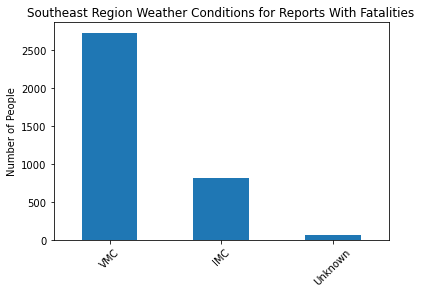

In [406]:
southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
            title="Southeast Region Weather Conditions for Reports With Fatalities", ylabel="Number of People", rot=45);

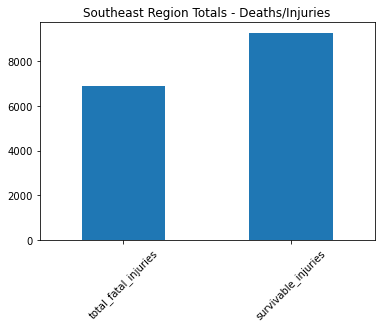

In [408]:
southeast_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                    title= "Southeast Region Totals - Deaths/Injuries", rot=45);

# TOP TEN MAKE STATS FOR SOUTHEAST REGION

In [366]:
southeast_top_ten_list = list(southeast_states['make'].value_counts()[:10].index)

In [367]:
southeast_top_ten_df = southeast_states.loc[southeast_states['make'].isin(southeast_top_ten_list) == True]
southeast_top_ten_df['make'].value_counts()

cessna         5396
piper          3056
beech          1318
bell            536
grumman         448
boeing          336
mooney          323
air tractor     264
hughes          196
bellanca        187
Name: make, dtype: int64

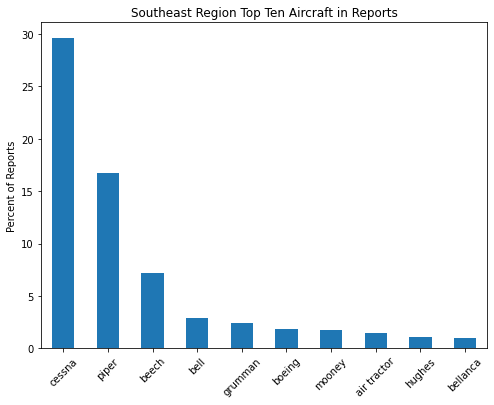

In [410]:
(southeast_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', 
                            title="Southeast Region Top Ten Aircraft in Reports", 
                            ylabel= "Percent of Reports", rot=45, figsize=(8,6));

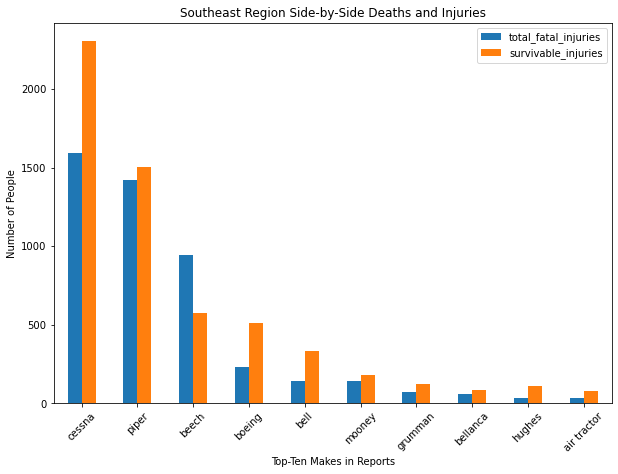

In [412]:
southeast_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="Southeast Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

### WEST STATES

In [413]:
west_states.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event,states_names
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",united states,Unknown,Unknown,Fatal(2),Destroyed,Unknown,stinson,108-3,No,1.0,Reciprocating,Personal,Unknown,2.0,0.0,0.0,0.0,Unknown,Cruise,Probable Cause,0.0,1948,ID
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",united states,Unknown,Unknown,Fatal(4),Destroyed,Unknown,piper,PA24-180,No,1.0,Reciprocating,Personal,Unknown,4.0,0.0,0.0,0.0,Unknown,Unknown,Probable Cause,0.0,1962,CA


In [414]:
west_states = df.loc[(df['states_names'].isin(west)  == True) & (df["country"] == 'united states')]

In [415]:
west_states["states_names"].unique()

array(['ID', 'CA', 'WA', 'NM', 'UT', 'AK', 'MT', 'OR', 'NV', 'AZ', 'WY',
       'HI', 'CO'], dtype=object)

In [416]:
west_states.describe()

,total_fatal_injuries,total_serious_injuries,total_minor_injuries,survivable_injuries,year_of_event
count,32128.000000,32128.000000,32128.000000,32128.000000,32128.000000
mean,0.360091,0.218034,0.277764,0.495798,1998.583479
std,1.376663,1.193847,1.211826,1.989228,11.525979
min,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,0.000000,0.000000,0.000000,0.000000,1988.000000
50%,0.000000,0.000000,0.000000,0.000000,1997.000000
75%,0.000000,0.000000,0.000000,1.000000,2008.000000
max,88.000000,137.000000,96.000000,187.000000,2022.000000


In [417]:
w_plot = west_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum()

In [301]:
west_states.loc[west_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()

VMC        4392
IMC        1109
Unknown     279
Name: weather_condition, dtype: int64

In [303]:
w_weather_ratio = west_states.loc[west_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts()/1109
w_weather_ratio

VMC        3.960325
IMC        1.000000
Unknown    0.251578
Name: weather_condition, dtype: float64

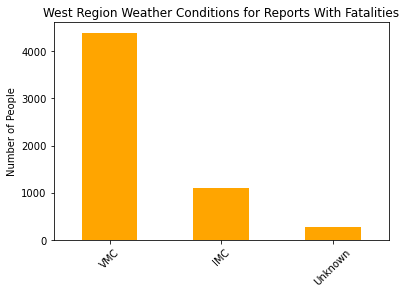

In [419]:
west_states.loc[west_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
         title="West Region Weather Conditions for Reports With Fatalities", 
         ylabel="Number of People", color='orange', rot=45);

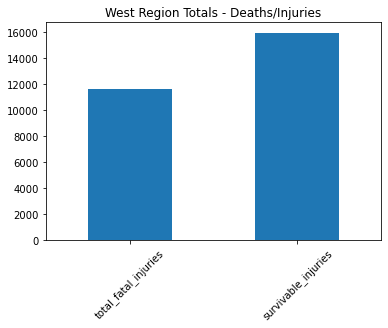

In [421]:
west_states.loc[:, ['total_fatal_injuries', 'survivable_injuries']].sum().plot(kind='bar', 
                    title= "West Region Totals - Deaths/Injuries", rot=45);

# TOP TEN MAKE STATS FOR WEST REGION

In [373]:
west_top_ten_list = list(west_states['make'].value_counts()[:10].index)

In [374]:
west_top_ten_df = west_states.loc[west_states['make'].isin(west_top_ten_list) == True]
west_top_ten_df['make'].value_counts()

cessna      10564
piper        5421
beech        1678
bell          994
boeing        491
bellanca      466
mooney        441
robinson      409
hughes        386
maule         337
Name: make, dtype: int64

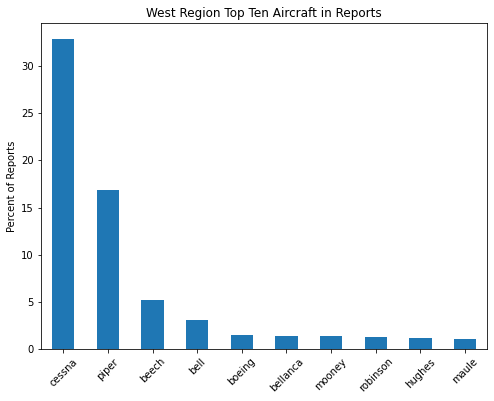

In [423]:
(west_states['make'].value_counts(normalize=True)[:10] * 100).plot(kind='bar', figsize=(8,6),
                            title="West Region Top Ten Aircraft in Reports", ylabel= "Percent of Reports", rot=45);

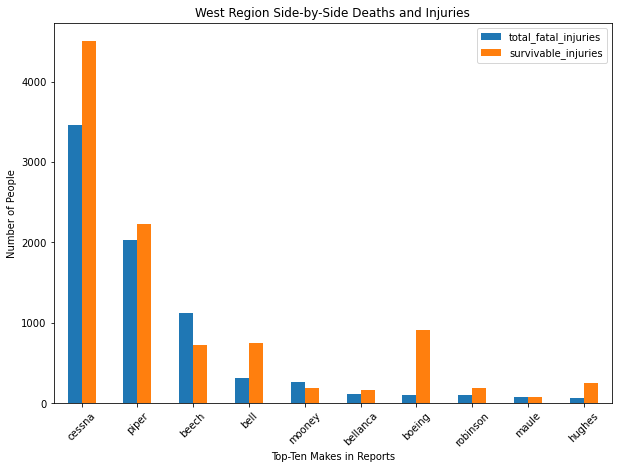

In [425]:
west_top_ten_df.groupby('make')[["total_fatal_injuries", 'survivable_injuries']].sum().sort_values(by="total_fatal_injuries", ascending=False).plot(
    kind='bar', figsize=(10,7), title="West Region Side-by-Side Deaths and Injuries", 
    ylabel="Number of People", xlabel= "Top-Ten Makes in Reports", rot=45);

# COMPARISON CHARTS

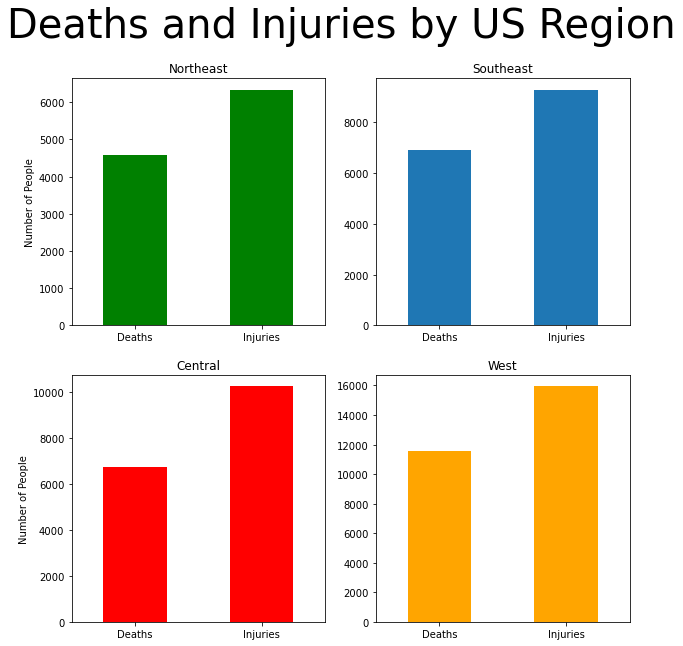

In [258]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.suptitle("Deaths and Injuries by US Region", fontsize=40)
n_plot.plot(kind='bar', title='Northeast', ax=ax[0][0], ylabel="Number of People", rot=0, color='green')
s_plot.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
c_plot.plot(kind='bar', title='Central', ax=ax[1][0], ylabel="Number of People", rot=0, color='red')
w_plot.plot(kind='bar', title='West', ax= ax[1][1], rot=0, color='orange')
ax[0][0].set_xticklabels(["Deaths", "Injuries"])
ax[0][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][0].set_xticklabels(["Deaths", "Injuries"]);

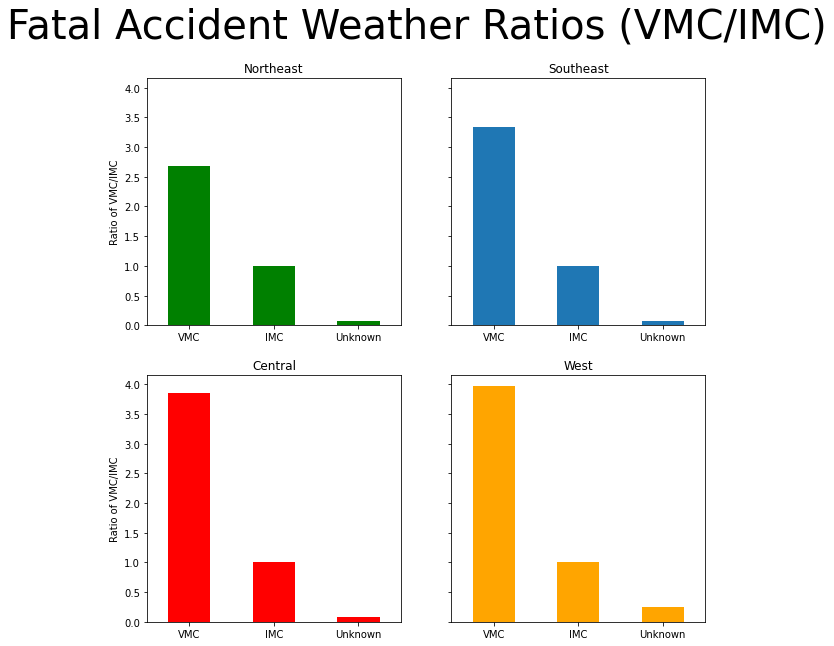

In [429]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10), sharey=True)
fig.suptitle("Fatal Accident Weather Ratios (VMC/IMC)", fontsize=40)
ne_weather_ratio.plot(kind='bar', title='Northeast', ax=ax[0][0], ylabel="Ratio of VMC/IMC", rot=0, color='green')
se_weather_ratio.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
c_weather_ratio.plot(kind='bar', title='Central', ax=ax[1][0], ylabel="Ratio of VMC/IMC", rot=0, color='red')
w_weather_ratio.plot(kind='bar', title='West', ax= ax[1][1], rot=0, color='orange')
ax[0][0].set_xticklabels(["VMC", 'IMC', 'Unknown'])
ax[0][1].set_xticklabels(["VMC", 'IMC', 'Unknown'])
# ax[0][1].set_xticks([0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
ax[1][1].set_xticklabels(["VMC", 'IMC', 'Unknown'])
ax[1][0].set_xticklabels(["VMC", 'IMC', 'Unknown']);

# Adjusting the above values on a per-flight basis

In [261]:
northeast_states.shape

(10806, 28)

In [260]:
len(northeast_states)

10806

In [259]:
n_plot / len(northeast_states)

total_fatal_injuries    0.424209
survivable_injuries     0.585601
dtype: float64

In [262]:
np2 = n_plot / len(northeast_states)
sp2 = s_plot / len(southeast_states)
cp2 = c_plot / len(central_states)
wp2 = w_plot / len(west_states)

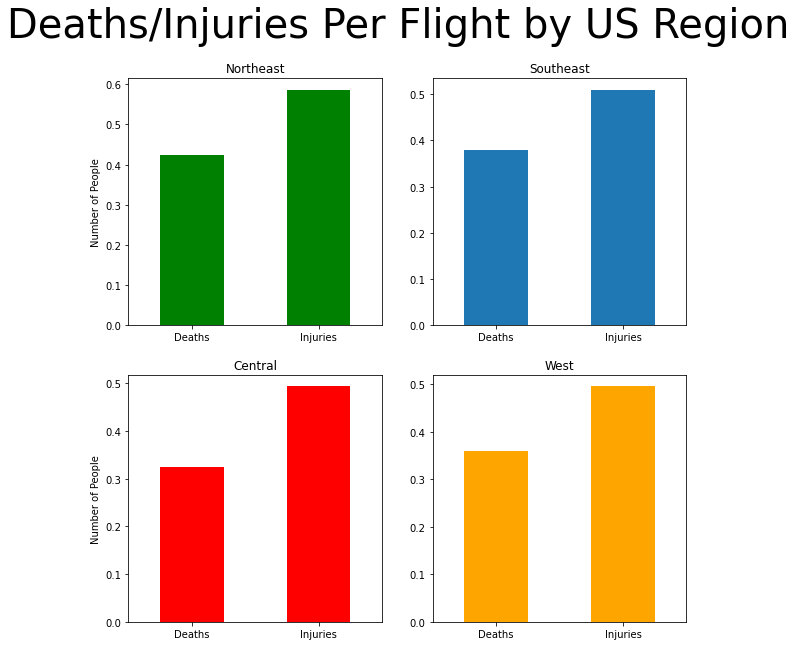

In [264]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
fig.suptitle("Deaths/Injuries Per Flight by US Region", fontsize=40)
np2.plot(kind='bar', title='Northeast', ax=ax[0][0], ylabel="Number of People", rot=0, color='green')
sp2.plot(kind='bar', title='Southeast', ax=ax[0][1], rot=0)
cp2.plot(kind='bar', title='Central', ax=ax[1][0], ylabel="Number of People", rot=0, color='red')
wp2.plot(kind='bar', title='West', ax= ax[1][1], rot=0, color='orange')
ax[0][0].set_xticklabels(["Deaths", "Injuries"])
ax[0][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][1].set_xticklabels(["Deaths", "Injuries"])
ax[1][0].set_xticklabels(["Deaths", "Injuries"]);

In [ ]:
southeast_states.loc[southeast_states['total_fatal_injuries'] >= 1]['weather_condition'].value_counts().plot(kind='bar', 
                            title="Weather Conditions for Reports With Fatalities", ylabel="Number of People");

# GENERAL EXPLORATION

In [17]:
df[df["investigation_type"] == "Accident"]['make'].value_counts()

Cessna                    21973
Piper                     11885
CESSNA                     4820
Beech                      4170
PIPER                      2799
                          ...  
HEBERLEIN RONALD              1
Larsen Charles Bennett        1
BROWN NARCISSE A              1
Sayer, Trevor A.              1
MICHAEL W MORGAN              1
Name: make, Length: 8170, dtype: int64

# Need to standardize the case of letters in this column

#### Adjusting the Manufacturer name of the aircraft to lower case

In [18]:
df['make'] = df['make'].str.lower()

### LOWERCASE Country Column

In [89]:
df['country'] = df['country'].str.lower()

### 1948 - 2022, median is from 1998 - overall span of 74 years

In [21]:
df['year_of_event'].describe()

count    88889.000000
mean      1999.206662
std         11.888226
min       1948.000000
25%       1989.000000
50%       1998.000000
75%       2009.000000
max       2022.000000
Name: year_of_event, dtype: float64

In [22]:
top_ten_accident_craft = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=False)[:10]
top_ten_accident_craft

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64

In [23]:
list(top_ten_accident_craft.index)

['cessna',
 'piper',
 'beech',
 'bell',
 'boeing',
 'mooney',
 'robinson',
 'grumman',
 'bellanca',
 'hughes']

In [24]:
top_ten_incident_craft = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=False)[:10]

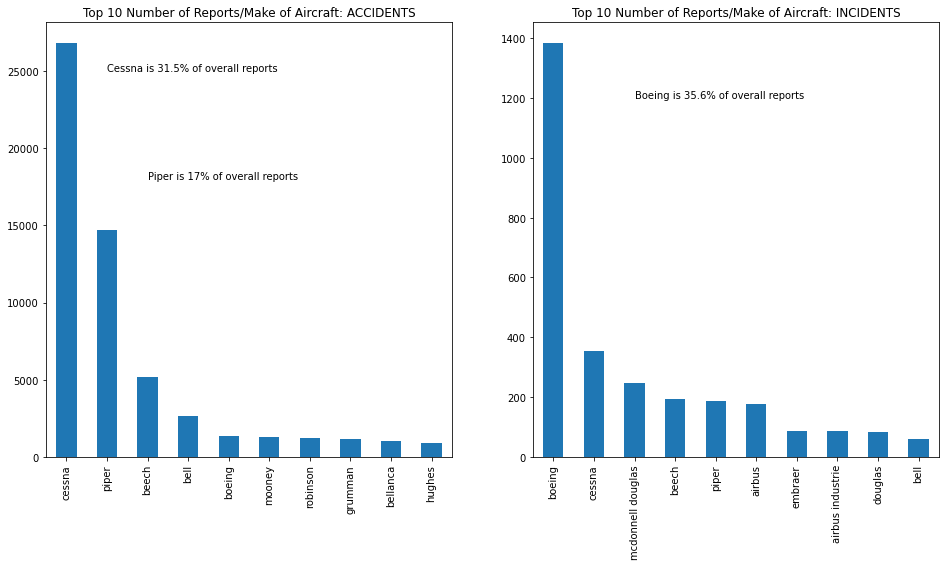

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title("Top 10 Number of Reports/Make of Aircraft: ACCIDENTS")
ax2.set_title("Top 10 Number of Reports/Make of Aircraft: INCIDENTS")
ax1.annotate(xy=(1, 25000), text="Cessna is 31.5% of overall reports")
ax1.annotate("Piper is 17% of overall reports", xy=(2, 18000))
ax2.annotate("Boeing is 35.6% of overall reports", xy=(2, 1200))
top_ten_accident_craft.plot(kind='bar', ax=ax1)
top_ten_incident_craft.plot(kind='bar', ax=ax2);

In [26]:
top_ten_accident_craft_normalized = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=True)[:10]

In [27]:
top_ten_incident_craft_normalized = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=True)[:10]

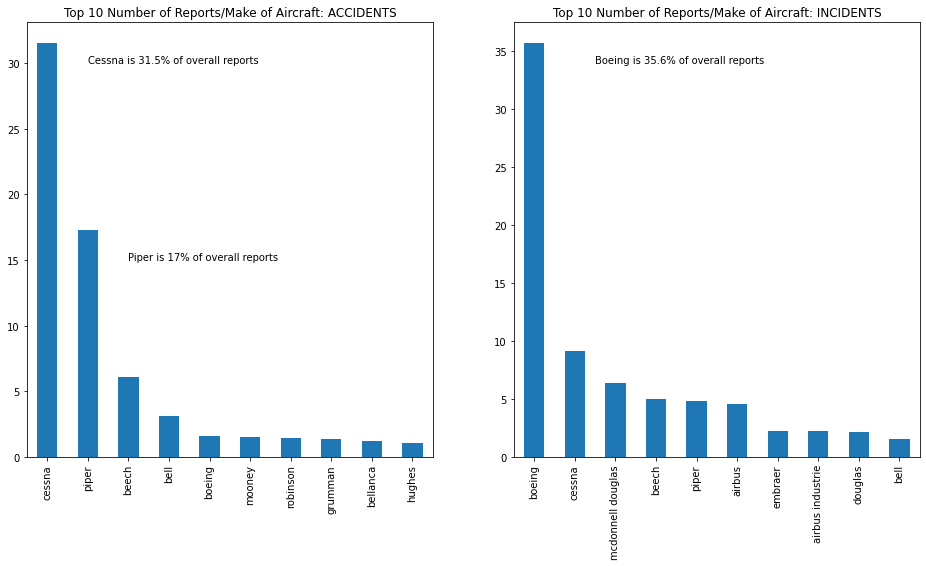

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title("Top 10 Number of Reports/Make of Aircraft: ACCIDENTS")
ax2.set_title("Top 10 Number of Reports/Make of Aircraft: INCIDENTS")
ax1.annotate(xy=(1, 30), text="Cessna is 31.5% of overall reports")
ax1.annotate("Piper is 17% of overall reports", xy=(2, 15))
ax2.annotate("Boeing is 35.6% of overall reports", xy=(1.5, 34))
(top_ten_accident_craft_normalized * 100).plot(kind='bar', ax=ax1)
(top_ten_incident_craft_normalized * 100).plot(kind='bar', ax=ax2);

### ACCIDENTS: Severe outcome not caused by instrumental failure

### INCIDENTS: Moderate outcome typically caused by instrumental failure

# TOP TEN ACCIDENT ANALYSIS

In [29]:
top_ten_accident_craft_normalized = df[df["investigation_type"] == "Accident"]['make'].value_counts(normalize=True)[:10]

In [30]:
top_ten_accident_craft

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64

In [33]:
print(top_ten_accident_craft, top_ten_accident_craft_normalized)

cessna      26793
piper       14684
beech        5177
bell         2662
boeing       1362
mooney       1311
robinson     1219
grumman      1158
bellanca     1040
hughes        925
Name: make, dtype: int64 cessna      0.315156
piper       0.172722
beech       0.060895
bell        0.031312
boeing      0.016021
mooney      0.015421
robinson    0.014339
grumman     0.013621
bellanca    0.012233
hughes      0.010880
Name: make, dtype: float64


# INCIDENT ANALYSIS

In [31]:
top_ten_incident_craft_normalized = df[df["investigation_type"] == "Incident"]['make'].value_counts(normalize=True)[:10]

In [32]:
print(top_ten_incident_craft, top_ten_incident_craft_normalized)

boeing               1383
cessna                356
mcdonnell douglas     247
beech                 195
piper                 186
airbus                179
embraer                88
airbus industrie       88
douglas                85
bell                   60
Name: make, dtype: int64 boeing               0.356995
cessna               0.091895
mcdonnell douglas    0.063758
beech                0.050336
piper                0.048012
airbus               0.046205
embraer              0.022716
airbus industrie     0.022716
douglas              0.021941
bell                 0.015488
Name: make, dtype: float64


### BOEING ANALYSIS

In [34]:
boeing_inc = df[(df['make'] == "boeing") & (df['investigation_type'] == 'Incident')]

In [35]:
boeing_inc.head(2)

,event_id,investigation_type,accident_number,event_date,location,country,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,survivable_injuries,year_of_event
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",UNITED STATES,ONT,ONTARIO INTERNATIONAL,Incident,Minor,Airplane,boeing,B737-2H4,No,2.0,Turbo Jet,Unknown,Aircal,0,0,0,119.0,IMC,Approach,Probable Cause,0.0,1982
351,20020917X02151,Incident,FTW82IA062,1982-02-19,"HARLINGEN, TX",UNITED STATES,HRL,HARLINGEN IND.AIR PARK,Incident,Unknown,Airplane,boeing,B-727-200,No,3.0,Turbo Jet,Unknown,Mexicana Airlines,Unknown,Unknown,Unknown,83.0,IMC,Landing,Probable Cause,0.0,1982


### engine types:

In [91]:
engine = boeing_inc['engine_type'].value_counts()

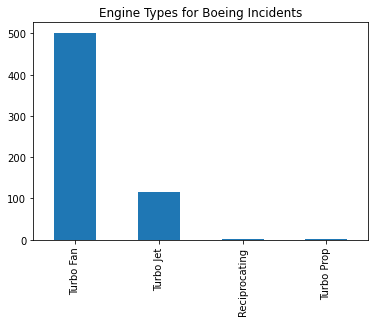

In [93]:
engine.drop("Unknown").plot(kind="bar", title=("Engine Types for Boeing Incidents"));

### number of engines

In [38]:
boe_eng_num = boeing_inc['number_of_engines'].value_counts()

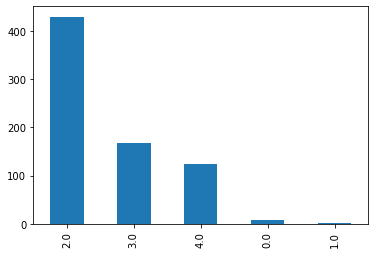

In [39]:
boe_eng_num.drop("Unknown").plot(kind='bar');

### Broad-phase info

In [40]:
boe_phase = boeing_inc['broad_phase_of_flight'].value_counts()
boe_phase['Unknown']

911

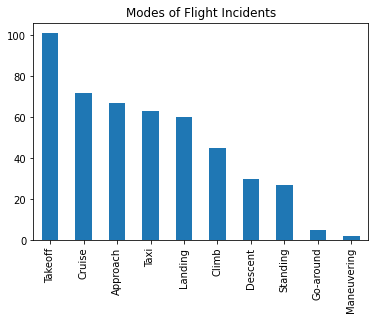

In [41]:
boe_phase.drop("Unknown").plot(kind='bar', title=("Modes of Flight Incidents"));

### Different models of Boeing

In [42]:
boeing_inc['model'].dtype

dtype('O')

In [43]:
boeing_inc['model'].value_counts(normalize=True)

737         0.255965
777         0.052061
747         0.046999
767         0.028200
757         0.026753
              ...   
747-212B    0.000723
737 823     0.000723
737-3A4     0.000723
747-240     0.000723
747-481F    0.000723
Name: model, Length: 347, dtype: float64

In [44]:
boeing_sts_model = boeing_inc[boeing_inc['model'].str.startswith("737") == True]

In [45]:
boeing_sts_model['model'].value_counts()

737          354
737-800       22
737-300       22
737-200       18
737-400       15
            ... 
737 - 4Q8      1
737-4Q8        1
737 7L9        1
737-8H4        1
737 - 476      1
Name: model, Length: 80, dtype: int64

### A lot of detail around model 737